<a href="https://colab.research.google.com/github/nik0011/AI-stock-trading-system/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf


In [325]:
start = '2010-01-01'
end = '2020-12-31'
df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04 00:00:00+00:00,6.447413,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05 00:00:00+00:00,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06 00:00:00+00:00,6.355828,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07 00:00:00+00:00,6.344078,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08 00:00:00+00:00,6.386253,7.570714,7.571429,7.466429,7.510714,447610800


In [326]:
df.tail()


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-12-23 00:00:00+00:00,128.059891,130.960007,132.429993,130.779999,132.160004,88223700
2020-12-24 00:00:00+00:00,129.047516,131.970001,133.460007,131.100006,131.320007,54930100
2020-12-28 00:00:00+00:00,133.663040,136.690002,137.339996,133.509995,133.990005,124486200
2020-12-29 00:00:00+00:00,131.883316,134.869995,138.789993,134.339996,138.050003,121047300
2020-12-30 00:00:00+00:00,130.758759,133.720001,135.990005,133.399994,135.580002,96452100


In [327]:
df =df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04 00:00:00+00:00,6.447413,7.643214,7.660714,7.585000,7.622500,493729600
1,2010-01-05 00:00:00+00:00,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2,2010-01-06 00:00:00+00:00,6.355828,7.534643,7.686786,7.526786,7.656429,552160000
3,2010-01-07 00:00:00+00:00,6.344078,7.520714,7.571429,7.466071,7.562500,477131200
4,2010-01-08 00:00:00+00:00,6.386253,7.570714,7.571429,7.466429,7.510714,447610800


In [328]:
df =df.drop(['Date', 'Adj Close'], axis=1)
df.head()

<ipython-input-328-e53e0cb3e794>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df =df.drop(['Date', 'Adj Close'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800


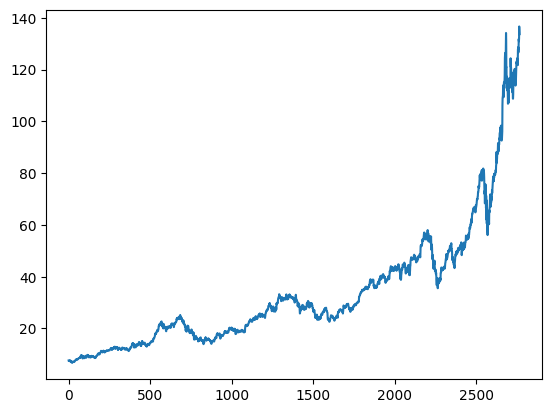

In [329]:
plt.plot(df.Close)

In [330]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2763,118.000475
2764,118.223525
2765,118.489800
2766,118.699475


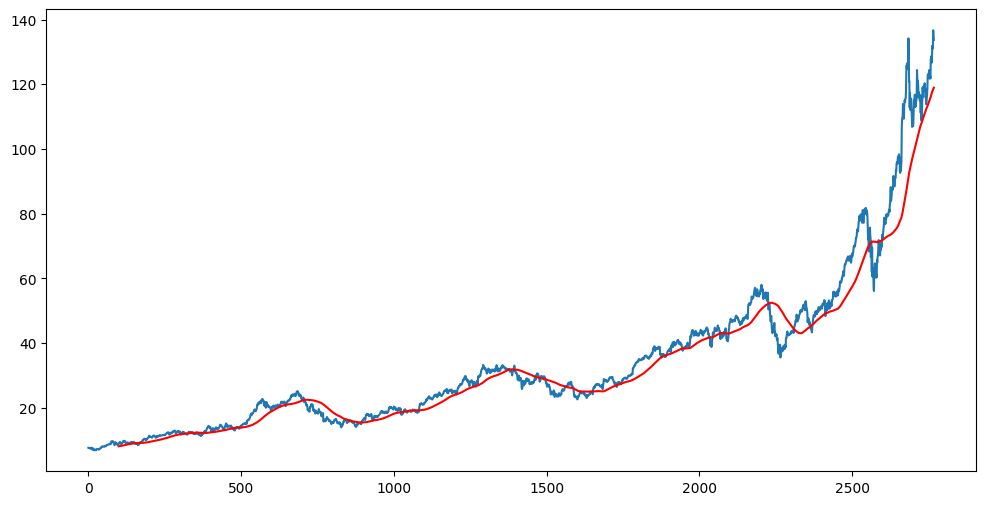

In [331]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')

In [332]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2763,98.809175
2764,99.158737
2765,99.494725
2766,99.866312


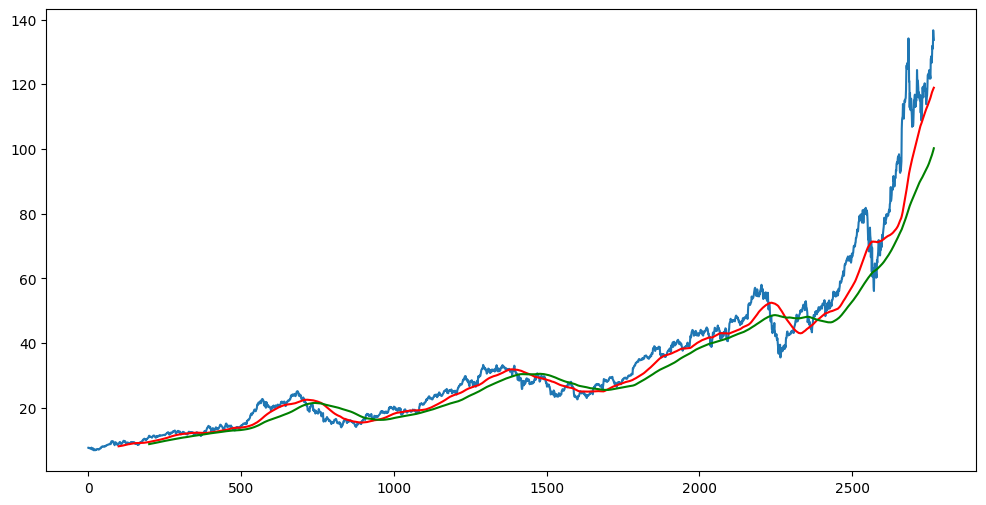

In [333]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')
plt.plot(ma200 , 'g')

In [334]:
df.shape

(2768, 5)

In [335]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [336]:
data_training.head()

Ticker,AAPL
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [337]:
data_testing.head()

Ticker,AAPL
1937,39.912498
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499


In [338]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [339]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02296349],
       [0.0233504 ],
       [0.01978458],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [340]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [341]:
#ML MODEL

In [299]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [342]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [343]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_30 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_31 (LSTM)                       │ (None, 100, 120)            │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 100, 120)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100, 1)              │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [344]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 324ms/step - loss: 0.1307
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 314ms/step - loss: 0.0629
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 304ms/step - loss: 0.0609
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 336ms/step - loss: 0.0586
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 306ms/step - loss: 0.0559
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - loss: 0.0585
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 315ms/step - loss: 0.0562
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 303ms/step - loss: 0.0550
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 322ms/step - loss: 0.0566
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - loss: 0.0578
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 332ms/step - loss: 0.0561
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step - loss: 0.0584
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 331ms/step - loss: 0.0545
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 300ms/step - loss: 0.0538
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [345]:
model.save('my_model.keras')

In [346]:
data_testing.head()

Ticker,AAPL
1937,39.912498
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499


In [347]:
past_100_days = data_training.tail(100)

In [348]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.shape

(931, 1)

In [349]:
final_df.head()

Ticker,AAPL
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498


In [350]:
scaler = MinMaxScaler(feature_range=(0, 1))
input_data = scaler.fit_transform(final_df)  # This should work
print(input_data.shape)

(931, 1)


In [351]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [352]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [353]:
#Making Prediction
y_predicted = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step


In [354]:
y_predicted = y_predicted[:, -1, 0]
y_predicted.shape

(831,)

In [355]:
y_test

array([0.04315691, 0.03977061, 0.04372544, 0.0407346 , 0.0408829 ,
       0.03430804, 0.02768371, 0.02397607, 0.02066392, 0.02706577,
       0.02975997, 0.02741181, 0.02948808, 0.02872184, 0.03037791,
       0.02790615, 0.03262723, 0.03240478, 0.03373951, 0.03388781,
       0.03549448, 0.034135  , 0.03658206, 0.04372544, 0.04518377,
       0.04342881, 0.03408556, 0.03475294, 0.0345552 , 0.03685395,
       0.03514843, 0.03762019, 0.05156092, 0.06063227, 0.06636674,
       0.06105247, 0.06406802, 0.07491904, 0.07924462, 0.0806288 ,
       0.08416344, 0.0832736 , 0.08028276, 0.07855253, 0.07205179,
       0.06646563, 0.07145859, 0.06911039, 0.0686902 , 0.07650097,
       0.08099959, 0.08102429, 0.07884913, 0.07632796, 0.06745432,
       0.07331241, 0.071335  , 0.0682453 , 0.06784981, 0.06629259,
       0.06705886, 0.06718242, 0.07533924, 0.07294163, 0.07435055,
       0.07422695, 0.07855253, 0.08460834, 0.07996142, 0.07949181,
       0.08112315, 0.08112315, 0.07014856, 0.07022271, 0.07140

In [356]:
y_predicted

array([0.4333648 , 0.4333647 , 0.43336454, 0.43336436, 0.43336418,
       0.43336397, 0.43336377, 0.43336347, 0.43336305, 0.43336254,
       0.43336198, 0.43336153, 0.43336114, 0.43336087, 0.43336067,
       0.43336058, 0.4333605 , 0.4333605 , 0.43336052, 0.43336058,
       0.4333607 , 0.43336082, 0.43336093, 0.43336105, 0.43336123,
       0.4333615 , 0.4333618 , 0.43336204, 0.43336216, 0.4333622 ,
       0.43336216, 0.43336207, 0.433362  , 0.43336207, 0.43336236,
       0.43336296, 0.43336374, 0.43336457, 0.43336552, 0.4333666 ,
       0.4333677 , 0.43336883, 0.43336993, 0.43337092, 0.43337175,
       0.43337232, 0.43337262, 0.4333727 , 0.43337262, 0.4333725 ,
       0.43337238, 0.43337235, 0.4333725 , 0.43337274, 0.433373  ,
       0.43337315, 0.43337324, 0.43337327, 0.43337318, 0.43337303,
       0.43337286, 0.43337268, 0.43337247, 0.43337235, 0.43337232,
       0.43337244, 0.43337256, 0.4333728 , 0.4333731 , 0.43337348,
       0.43337387, 0.43337423, 0.43337455, 0.43337473, 0.43337

In [319]:
scaler.scale_


array([0.00988704])

In [320]:
scale_factor = 1/0.00988704
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

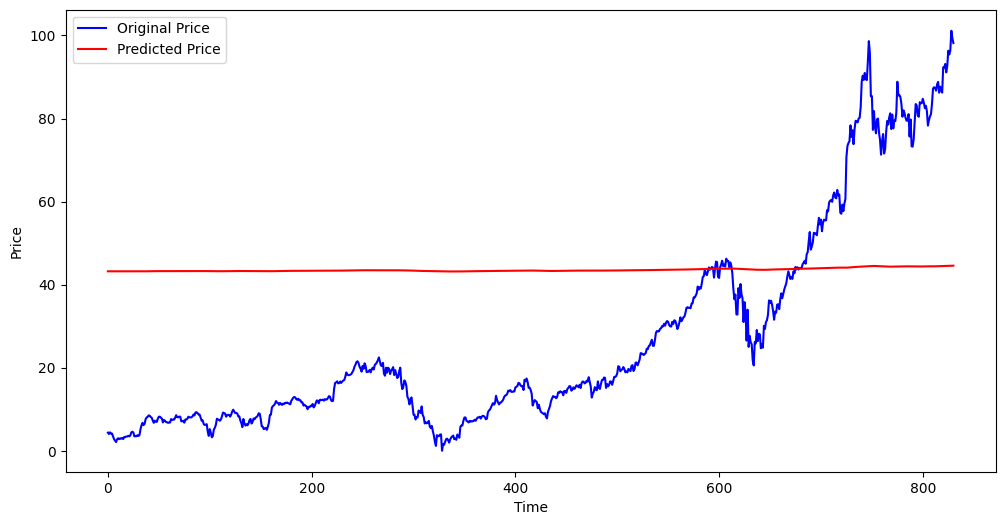

In [321]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()